## For 1-Feature Linear Regression Problem
Below, I presented a guide on how to use the code for 1-Feature or 1-Variable Linear Regression Problems.

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# generate dummy data
x_train = np.linspace(-10, 10, num=80)
y = np.array([(val*0.61) + 6.78 for val in x_train])
y_train = y + norm.rvs(loc=y.mean(), scale=y.std()/4, size=80)

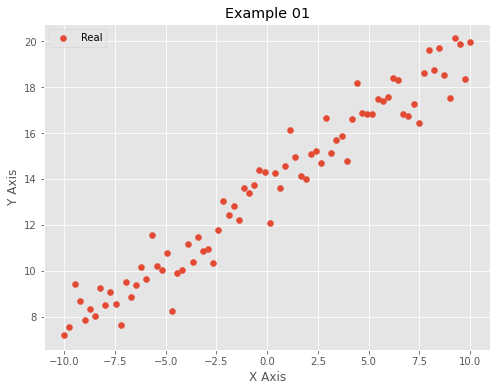

In [2]:
# plot our data
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8, 6]
plt.scatter(x_train, y_train, label='Real')
plt.legend(); plt.xlabel('X Axis'); plt.ylabel('Y Axis'); plt.title('Example 01')
plt.show()

In [3]:
import gradientdescent as gd

# specify the parameters first
parameters = {
    'w_in': np.array([0]), # w_in must be a ndarray
    'b_in': 0,
    'alpha': 0.01,
    'iters': 10000
}

# fit linear regression with gradient descent
w, b, hist_j = gd.linreg_gd(x_train, y_train, parameters, cost_func=gd.calc_cost, grad_func=gd.calc_gradient)

Iteration 0, Cost: 98.89053187677807 
coefficients: [0]
intercept: 0

Iteration 2000, Cost: 0.3498345247112532 
coefficients: [0.62115831]
intercept: 13.560772016037372

Iteration 4000, Cost: 0.3498345247112528 
coefficients: [0.62115831]
intercept: 13.56077204131126

Iteration 6000, Cost: 0.3498345247112528 
coefficients: [0.62115831]
intercept: 13.56077204131126

Iteration 8000, Cost: 0.3498345247112528 
coefficients: [0.62115831]
intercept: 13.56077204131126

Iteration 10000, Cost: 0.3498345247112528 
coefficients: [0.62115831]
intercept: 13.56077204131126



<div class="alert alert-block alert-info">
    <b>Tip:</b> If the cost or coefficients or intercept shows <code>inf</code> or <code>nan</code> result, try lowering down the learning rate <code>alpha</code>.
</div>

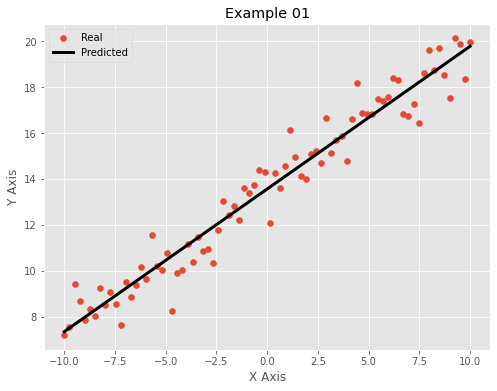

In [4]:
y_pred = gd.generate_pred(x_train, w, b)

# plot the result
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]
plt.scatter(x_train, y_train, label='Real')
plt.plot(x_train, y_pred, label='Predicted', c='k', lw=3)
plt.legend(); plt.xlabel('X Axis'); plt.ylabel('Y Axis'); plt.title('Example 01')
plt.show()

## For Multiple-Features Linear Regression Problem
Below, I presented a guide on how to use the code for Multiple-Features or Multiple-Variables Linear Regression Problems.

In [5]:
from sklearn import datasets
diabetes_df = datasets.load_diabetes(as_frame=True)
display(diabetes_df['data'].head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
#select bmi, bp and s4 column only
x_data = diabetes_df['data'].loc[:, ['bmi', 'bp', 's4']].values
y_data = diabetes_df['target'].values

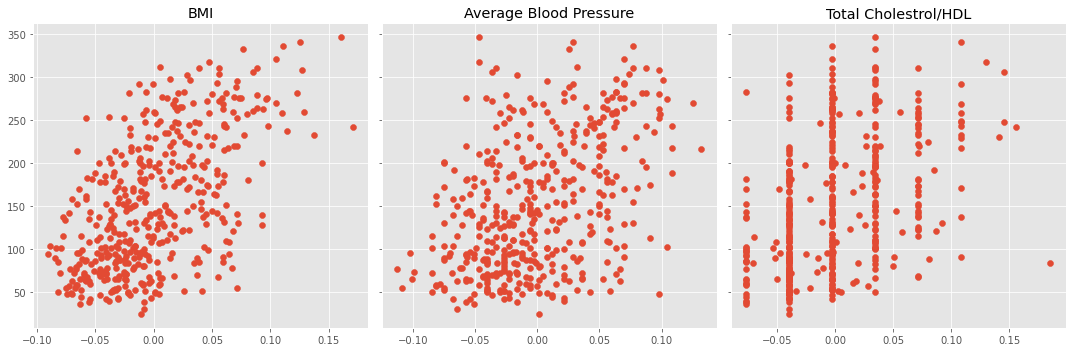

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
fig, axs = plt.subplots(ncols=3, sharey=True)
axs[0].scatter(x_data[:, 0], y_data)
axs[0].set_title('BMI')
axs[1].scatter(x_data[:, 1], y_data)
axs[1].set_title('Average Blood Pressure')
axs[2].scatter(x_data[:, 2], y_data)
axs[2].set_title('Total Cholestrol/HDL')
plt.tight_layout()
plt.show()

In [8]:
# specify the parameters first
parameters = {
    'w_in': np.array([100, 100, 100]),
    'b_in': 0,
    'alpha': 0.1,
    'iters': 200000
}

# fit multiple-feature linear regression with gradient descent
w, b, hist_J = gd.linreg_gd(x_data, y_data, parameters, cost_func=gd.calc_cost, grad_func=gd.calc_gradient)

Iteration 0, Cost: 14061.139186744565 
coefficients: [100 100 100]
intercept: 0

Iteration 40000, Cost: 1692.8947913813943 
coefficients: [668.79692133 366.62213534 326.12387547]
intercept: 152.13348416289597

Iteration 80000, Cost: 1692.8930108699265 
coefficients: [670.11570297 365.95658998 325.29927639]
intercept: 152.13348416289597

Iteration 120000, Cost: 1692.8930107726048 
coefficients: [670.12549595 365.95152723 325.29326959]
intercept: 152.13348416289597

Iteration 160000, Cost: 1692.8930107726048 
coefficients: [670.12556864 365.95148951 325.29322514]
intercept: 152.13348416289597

Iteration 200000, Cost: 1692.8930107726048 
coefficients: [670.12556918 365.95148923 325.29322481]
intercept: 152.13348416289597



In [9]:
y_pred = gd.generate_pred(x_data, w, b)

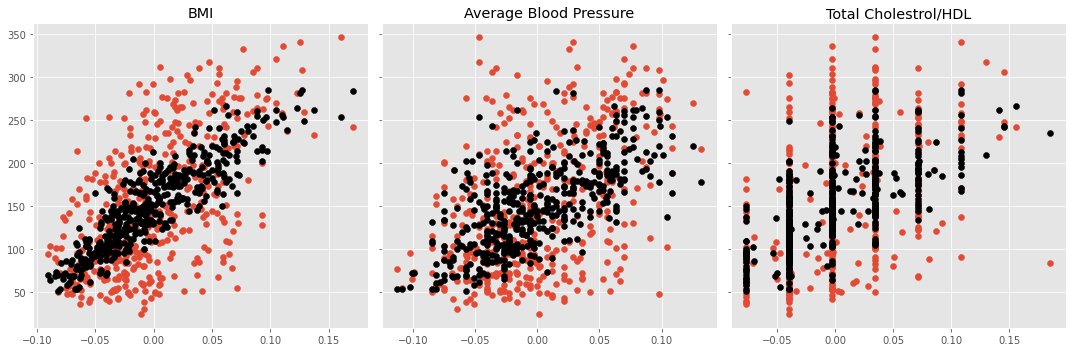

In [10]:
#plot the result
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]
fig, axs = plt.subplots(ncols=3, sharey=True)
axs[0].scatter(x_data[:, 0], y_data)
axs[0].scatter(x_data[:, 0], y_pred, color='k')
axs[0].set_title('BMI')
axs[1].scatter(x_data[:, 1], y_data)
axs[1].scatter(x_data[:, 1], y_pred, color='k')
axs[1].set_title('Average Blood Pressure')
axs[2].scatter(x_data[:, 2], y_data)
axs[2].scatter(x_data[:, 2], y_pred, color='k')
axs[2].set_title('Total Cholestrol/HDL')
plt.tight_layout()
plt.show()

## Scale Data with Scaler Module
Aside from gradient descent for linear regression problems, I've also created a useful module for data scaling. The scale methods in the module are as follows:
1. **Max Normalization**: Divide all data by its corresponding maximum value, column-wise if the data not 1-dimensional array. <code>x_data/x_max</code>
2. **Min Max Normalization**: <code>(x_data-x_min)/(x_max-x_min)</code>
3. **Mean Normalization**: Remove the mean of the data, so the data are centered in zero. <code>(x_data-x_mean)/x_range</code>
4. **Zscore Normalization**: Normalization using data's mean and std <code>(x_data-x_mean)/(x_std)</code>

If your data have different ranges, it's useful to scale it first before fitting it to a machine learning model.

In [11]:
# generate dummy data
x_train_1 = np.array([np.random.randint(low=-500, high=800) for _ in range(80)])
x_train_2 = np.linspace(-3, 3, num=80)
y = np.zeros((80,))
for idx in range(len(x_train_1)):
    temp = (6.1*x_train_1[idx]) + (1.27*x_train_2[idx]) + 53
    y[idx] = temp

x_train = np.c_[x_train_1, x_train_2]
y_train = y + norm.rvs(loc=y.mean(), scale=y.std()/4, size=80)

### Before Scaling 

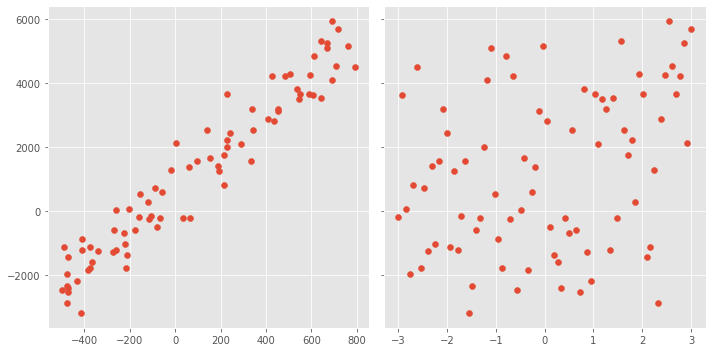

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
fig, axs = plt.subplots(ncols=2, sharey=True)
axs[0].scatter(x_train_1, y_train)
axs[1].scatter(x_train_2, y_train)
plt.tight_layout()

## After Scaling

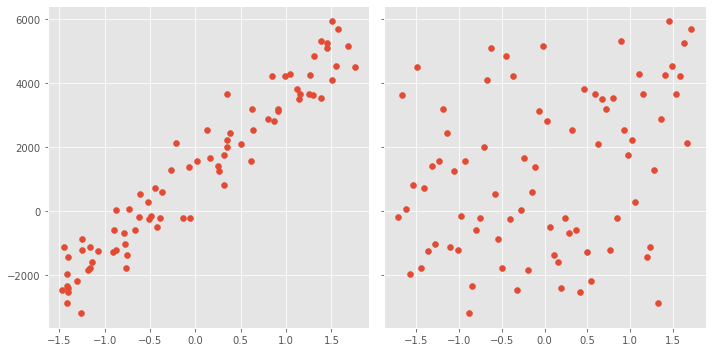

In [13]:
import scaler as sc
mean_x, range_x, x_scaled = sc.zscore_norm(x_train)

# plot the result
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
fig, axs = plt.subplots(ncols=2, sharey=True)
axs[0].scatter(x_scaled[:, 0], y_train)
axs[1].scatter(x_scaled[:, 1], y_train)
plt.tight_layout()